<a href="https://colab.research.google.com/github/AndreyBarTF/turbines_autumn_2022-Homework/blob/GAS-DZ.4/GAZ_DZ_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   ФИО Барбашин Андрей Алексеевич
*   Группа ТФэ-01-20
*   Тлеграмм @QwertyAlexx

Определить собственные частоты колебаний пакета лопаток в динамических условиях и построить вибрационную диаграмму для А0, A1, B0 форм колебаний на одном графике и сделать **вывод**. Средний диаметр ступени 1.25 м. Длинна рабочей лопатки 0.15 м. Площадь сечения лопатки 19.44 * 10е-4 м2. Момент инерции 1.43 * 10e-8 м4 $beta_y$ = 75. Плотность стали 12Х13 8000 кг/м3. Модуль упругости Е=2 * 10е11 Па. Число рабочих лопаток z=84. Размер бандажной ленты 60 х 5 мм. Число лопаток в пакете m = 8. Шаг по бандажу = 25 мм. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

MPa = 1e6
kW = 1e3
MW = 1e6
mm = 1e-3

m = 8
t = 25 * mm

beta = 75
density = 8000
E = 2 * (10**11)
z = 84
d = 1.25
l = 0.15
f = 19.44 * (10 ** (-4)) #Площадь сечения лопатки
J = 1.43 * (10 ** (-8))
#Размер бандажной ленты
delta = 5 * mm
B = 60 * mm 

i = (J / f) ** 0.5

_lambda = l / i
_lambda

55.30588810191244

In [2]:
psi = 0.98

In [3]:
def static_frequency(i):
    _m = {
        1: 0.56,
        2: 3.51,
        3: 9.82
 
    }
    first = psi * _m[i] / (l ** 2)
    second = ((E * J) / (density * f)) ** 0.5
    return first * second  

In [4]:
static_frequency(1), static_frequency(2), static_frequency(3)

(330.7664691980739, 2073.196976580784, 5800.226299151937)

In [5]:
H = 0.12
J_b = B * (delta ** 3) / 12

k = (12 * (m - 1) * H * E * J_b * l * np.sin(np.deg2rad(beta)) ** 2) / (m * t * J * E)

nu = B * delta * t / (f * l)

f_a0 = static_frequency(1) * 0.8
f_a1 = static_frequency(1) * 6
f_b0 = static_frequency(1) * 4.2

f_a0, f_a1, f_b0  # Hz
B_bandage = 0.5 * ((d/l) - 1) * ((nu+1/2)/(nu+1/3)) + np.sin(np.deg2rad(beta)) ** 2

def to_dynamic_frequency(f, n=50):
    root = (1 + B_bandage * (n / f) ** 2) ** 0.5
    return f * root

In [12]:
B_bandage

6.301685099217912

In [6]:
to_dynamic_frequency(f_a0), to_dynamic_frequency(f_a1), to_dynamic_frequency(f_b0)

(292.8725752291112, 1988.5639718136847, 1394.8778142902904)

In [7]:
def min_max(f, delta=0.05):
    return f * (1-delta) , f * (1 + delta)
 
n_line = np.linspace(0, 60)
min_line, max_line = min_max(to_dynamic_frequency(f_a0, n=n_line))
min_line1, max_line1 = min_max(to_dynamic_frequency(f_a1, n=n_line))
min_line2, max_line2 = min_max(to_dynamic_frequency(f_b0, n=n_line))

def k_line(k, n=n_line):
    return k * n_line

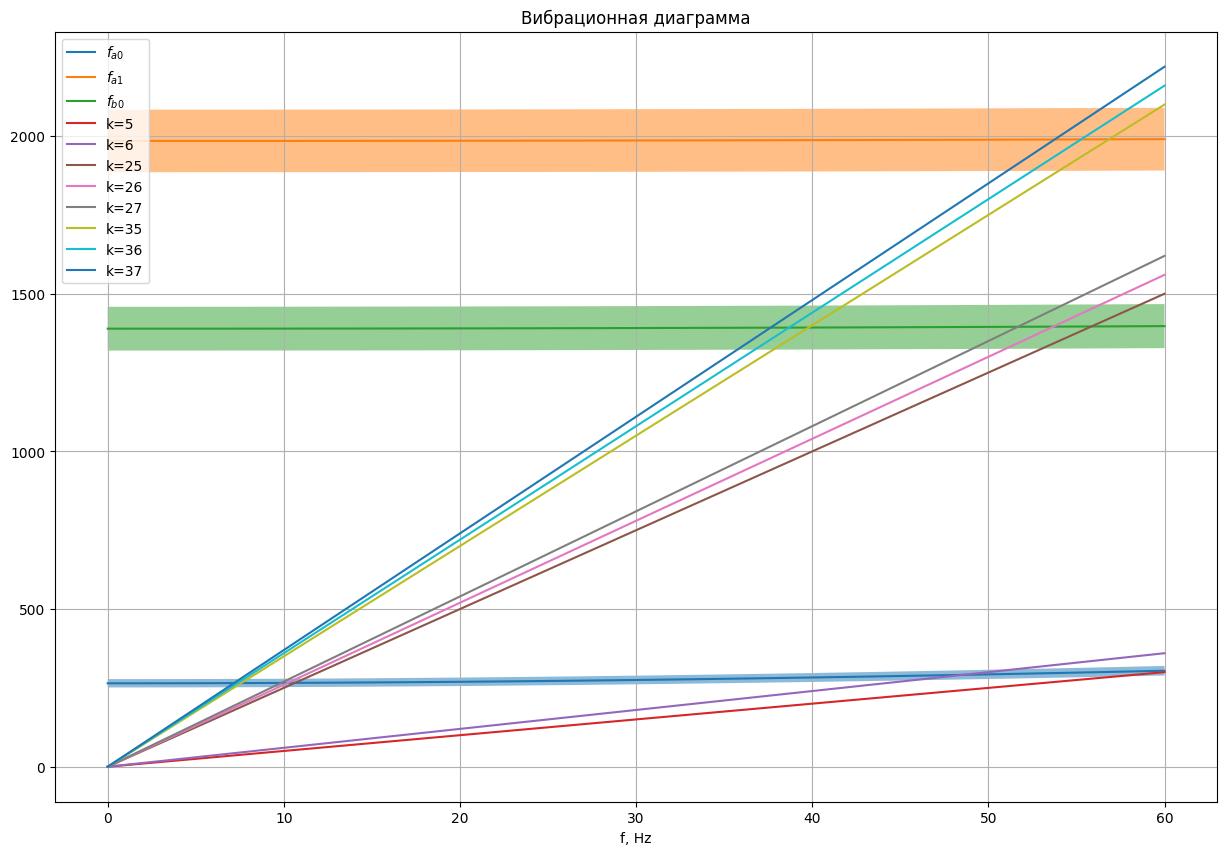

In [11]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax.plot(n_line, to_dynamic_frequency(f_a0, n=n_line), label='$f_{a0}$')
ax.plot(n_line, to_dynamic_frequency(f_a1, n=n_line), label='$f_{a1}$')
ax.plot(n_line, to_dynamic_frequency(f_b0, n=n_line), label='$f_{b0}$')
ax.fill_between(n_line, y1=min_line, y2=max_line, alpha=0.5)
ax.fill_between(n_line, y1=min_line1, y2=max_line1, alpha=0.5)
ax.fill_between(n_line, y1=min_line2, y2=max_line2, alpha=0.5)


ax.plot(n_line, k_line(5), label=f'k={5}')
ax.plot(n_line, k_line(6), label=f'k={6}')
ax.plot(n_line, k_line(25), label=f'k={25}')
ax.plot(n_line, k_line(26), label=f'k={26}')
ax.plot(n_line, k_line(27), label=f'k={27}')
ax.plot(n_line, k_line(35), label=f'k={35}')
ax.plot(n_line, k_line(36), label=f'k={36}')
ax.plot(n_line, k_line(37), label=f'k={37}')

#for x in range(1,37):
#  ax.plot(n_line, k_line(x), label=f'k={x}')

ax.set_xlabel("n, rps")
ax.set_xlabel("f, Hz")
ax.grid()
ax.legend()
ax.set_title("Вибрационная диаграмма");

Вывод:
Опасные зоны работы лопаточного аппарата определяются с помощью вибрационной диаграммы. На диаграмме изображены кривые, представляющие собой зависимость динамических частот колебаний лопаток от частоты вращения ротора турбины. Там же нанесены прямые линии, отражающие зависимости для возмущающих сил различной кратности (от k=1 до k=37). Поскольку значение коэффициента B_bandage всегда больше единицы, то рабочие лопатки не могут попасть в резонанс первой кратности (при k=1, когда имеется один источник возмущения). Но для каждой лопатки существует бесконечно большое число резонансов, соответствующих разным кратностям возмущающих сил: k=2, 3, 4, ...

На диаграмме изображены графики зависимости собственной динамической частоты от частоты вращения колеса n. Верхняя кривая max_line относится к лопатке (или пакету), имеющей наивысшую частоту колебаний лопаток (пакетов), закрепленных на колесе, нижняя min_line – к лопатке (пакету) с наинизшей частотой. Таким образом, между двумя кривыми существует область изменения собственных динамических частот колебаний лопаток (пакетов) в зависимости от числа оборотов. Разница частот в этой области определяет разброс, обусловленный невозможностью выполнить все лопатки или пакеты строго одинаковыми по частотным характеристикам.

Для А1: Опасными являются частоты в диапазоне (примерно) от 51-56 Гц при k=37, для k=(36-35) дипазон немного смещается, при попадание в этот диапазон ротор войдет в резонанс и может разрушится, для предотвращения необходимо произветси отстройку от резонанса.

Для B0: Опасными являются частоты в диапазоне (примерно) от 49-54 Гц при k=27, для k=(26-25) дипазон немного смещается, при попадание в этот диапазон ротор войдет в резонанс и может разрушится, для предотвращения необходимо произветси отстройку от резонанса.

Для A1: Опасными являются частоты в диапазоне (примерно) от 46-51 Гц при k=5, для k=6 дипазон немного смещается, при попадание в этот диапазон ротор войдет в резонанс и может разрушится, для предотвращения необходимо произветси отстройку от резонанса.